In [57]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score



In [2]:
#  Extract features such as mfcc, chroma, mel from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [12]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

observed_emotions=['calm', 'happy', 'fearful', 'disgust']

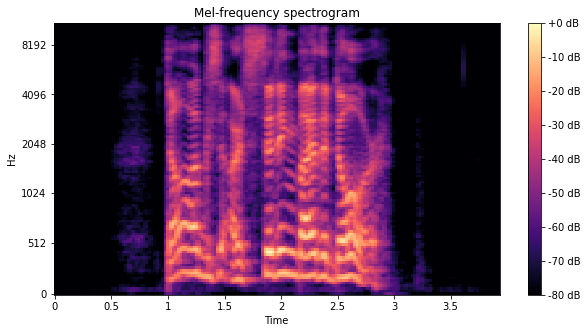

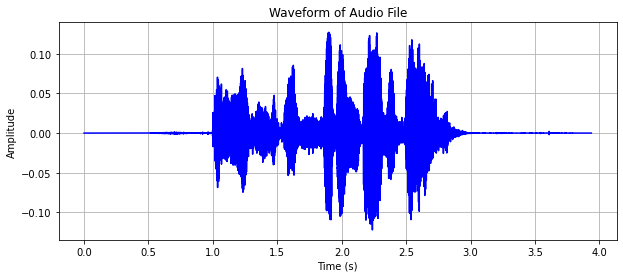

In [59]:
audio_path = '/home/r00t/Desktop/SER final year/speech-emotion-recognition-ravdess-data/Actor_01/03-01-03-02-02-01-01.wav'
y, sr = librosa.load(audio_path)

# Generate the Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# Convert to decibels
S_DB = librosa.power_to_db(S, ref=np.max)

# Display the Mel spectrogram
plt.figure(figsize=(10, 5))
librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.show()

t = np.arange(0, len(y)) / sr

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(t, y, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of Audio File')
plt.grid(True)
plt.show()

In [13]:
# Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("/home/r00t/Desktop/SER final year/speech-emotion-recognition-ravdess-data/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [14]:
x_train,x_test,y_train,y_test=load_data(test_size=0.25)
print((x_train.shape[0], x_test.shape[0]))


(576, 192)


In [43]:
# Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(350,), learning_rate='adaptive', max_iter=500)

In [44]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(350,),
              learning_rate='adaptive', max_iter=500)

In [45]:
# Predict for the test set
y_pred=model.predict(x_test)

In [46]:
# Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 75.00%


In [48]:
import pickle

with open('ser_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [54]:
# Load file to make new prediction
file = '/home/r00t/Desktop/SER final year/speech-emotion-recognition-ravdess-data/Actor_01/03-01-03-02-02-01-01.wav'
feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
feature = feature.reshape(1, -1)

In [55]:
# Predict
prediction = model.predict(feature)
print(prediction[0])

happy
